# Task 2

## Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem
## The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.

### Step 1 Data Preprocessing 
IMPORTING MODULES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
#loading the dataset

In [3]:
data = pd.read_csv("imdb movies data.csv")

In [4]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
data.shape

(15509, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [7]:
data.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981.000000,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,NaN,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,NaN,120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,NaN,240,2780,NaN,227,58,158,83,91
mean,NaN,-1987.012215,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,25.416689,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,-2022.000000,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,-2009.000000,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,-1991.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,-1968.000000,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [8]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
#maximum columns are having null values 

In [10]:
#so we need to remove all that columns which are having too much null values and 
#The column which is not critical for our prediction

In [11]:
data.drop(columns=['Duration'], inplace=True)

In [12]:
# Droping rows where 'Rating' is missing
data = data[data['Rating'].notnull()].copy()

In [13]:
data.reset_index(drop=True, inplace=True)

In [14]:
data.drop(columns='Name', inplace=True)

In [15]:
# Convert Year to positive values by multiplying by -1
data['Year'] = data['Year'].apply(lambda x: -x if x < 0 else x)

In [16]:
# Removeing commas and convert to float
data['Votes'] = data['Votes'].str.replace(',', '', regex=False).astype(float)

# Fill missing votes with median
data['Votes'].fillna(data['Votes'].median(), inplace=True)

C:\Users\SHIVAM SINHG\AppData\Local\Temp\ipykernel_3500\3302237563.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Votes'].fillna(data['Votes'].median(), inplace=True)


In [17]:
#We'll fill nulls in categorical columns (Genre, Director, Actor 1, Actor 2, Actor 3) with "Unknown":

cols_to_fill = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

for col in cols_to_fill:
    data[col].fillna('Unknown', inplace=True)    

C:\Users\SHIVAM SINHG\AppData\Local\Temp\ipykernel_3500\1449030263.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna('Unknown', inplace=True)


In [18]:
data.isnull().sum()

Year        0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7919 entries, 0 to 7918
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      7919 non-null   float64
 1   Genre     7919 non-null   object 
 2   Rating    7919 non-null   float64
 3   Votes     7919 non-null   float64
 4   Director  7919 non-null   object 
 5   Actor 1   7919 non-null   object 
 6   Actor 2   7919 non-null   object 
 7   Actor 3   7919 non-null   object 
dtypes: float64(3), object(5)
memory usage: 495.1+ KB


In [20]:
data['Genre']

0                           Drama
1                 Comedy, Romance
2          Comedy, Drama, Musical
3             Drama, Romance, War
4       Horror, Mystery, Thriller
                  ...            
7914         Action, Crime, Drama
7915         Action, Crime, Drama
7916                       Action
7917                Action, Drama
7918                Action, Drama
Name: Genre, Length: 7919, dtype: object

In [21]:
#Split the Genre strings into lists

In [22]:
data['Genre'] = data['Genre'].str.split(', ')
data['Genre']

0                           [Drama]
1                 [Comedy, Romance]
2          [Comedy, Drama, Musical]
3             [Drama, Romance, War]
4       [Horror, Mystery, Thriller]
                   ...             
7914         [Action, Crime, Drama]
7915         [Action, Crime, Drama]
7916                       [Action]
7917                [Action, Drama]
7918                [Action, Drama]
Name: Genre, Length: 7919, dtype: object

In [23]:
#We explode the list so each genre gets its own row temporarily, then create binary columns using get_dummies()

In [24]:
genre_dummies = data['Genre'].explode().str.get_dummies().groupby(level=0).sum()

In [25]:
print(genre_dummies)

      Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
0          0          0          0          0       0      0            0   
1          0          0          0          0       1      0            0   
2          0          0          0          0       1      0            0   
3          0          0          0          0       0      0            0   
4          0          0          0          0       0      0            0   
...      ...        ...        ...        ...     ...    ...          ...   
7914       1          0          0          0       0      1            0   
7915       1          0          0          0       0      1            0   
7916       1          0          0          0       0      0            0   
7917       1          0          0          0       0      0            0   
7918       1          0          0          0       0      0            0   

      Drama  Family  Fantasy  ...  Musical  Mystery  News  Romance  Sci-Fi 

In [26]:
data= pd.concat([data, genre_dummies], axis=1)

In [27]:
data.drop(columns='Genre', inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7919 entries, 0 to 7918
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         7919 non-null   float64
 1   Rating       7919 non-null   float64
 2   Votes        7919 non-null   float64
 3   Director     7919 non-null   object 
 4   Actor 1      7919 non-null   object 
 5   Actor 2      7919 non-null   object 
 6   Actor 3      7919 non-null   object 
 7   Action       7919 non-null   int64  
 8   Adventure    7919 non-null   int64  
 9   Animation    7919 non-null   int64  
 10  Biography    7919 non-null   int64  
 11  Comedy       7919 non-null   int64  
 12  Crime        7919 non-null   int64  
 13  Documentary  7919 non-null   int64  
 14  Drama        7919 non-null   int64  
 15  Family       7919 non-null   int64  
 16  Fantasy      7919 non-null   int64  
 17  History      7919 non-null   int64  
 18  Horror       7919 non-null   int64  
 19  Music 

### Step 2 Data Analysis EDA

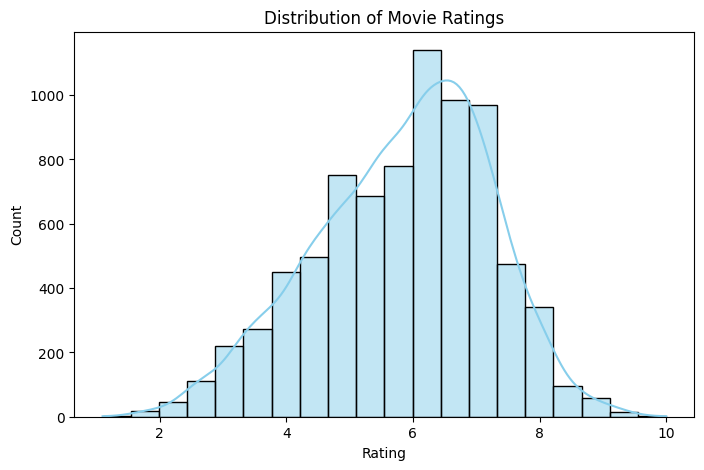

In [29]:
plt.figure(figsize=(8, 5))
sea.histplot(data['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

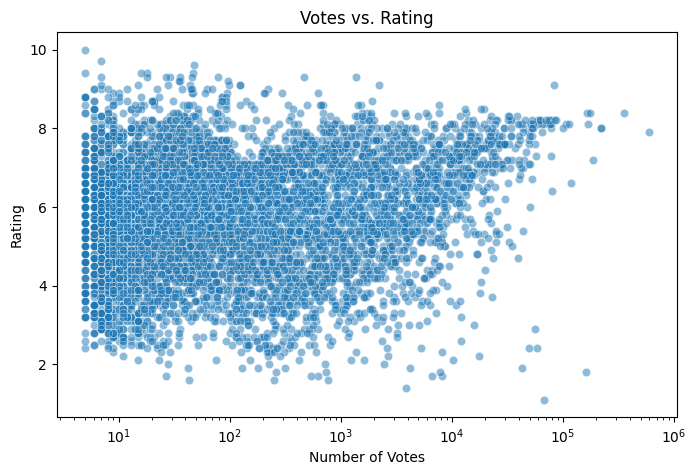

In [30]:
plt.figure(figsize=(8, 5))
sea.scatterplot(x='Votes', y='Rating', data=data, alpha=0.5)
plt.title('Votes vs. Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.xscale('log')  # Use log scale to handle outliers
plt.show()


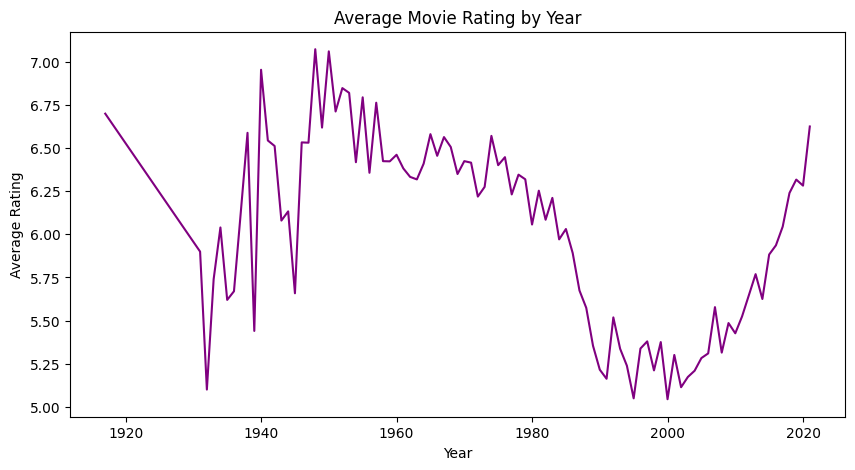

In [31]:
avg_rating_by_year = data.groupby('Year')['Rating'].mean()

plt.figure(figsize=(10, 5))
sea.lineplot(x=avg_rating_by_year.index, y=avg_rating_by_year.values, color='purple')
plt.title('Average Movie Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

C:\Users\SHIVAM SINHG\AppData\Local\Temp\ipykernel_3500\616335150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(x=top_directors.index, y=top_directors.values, palette='magma')


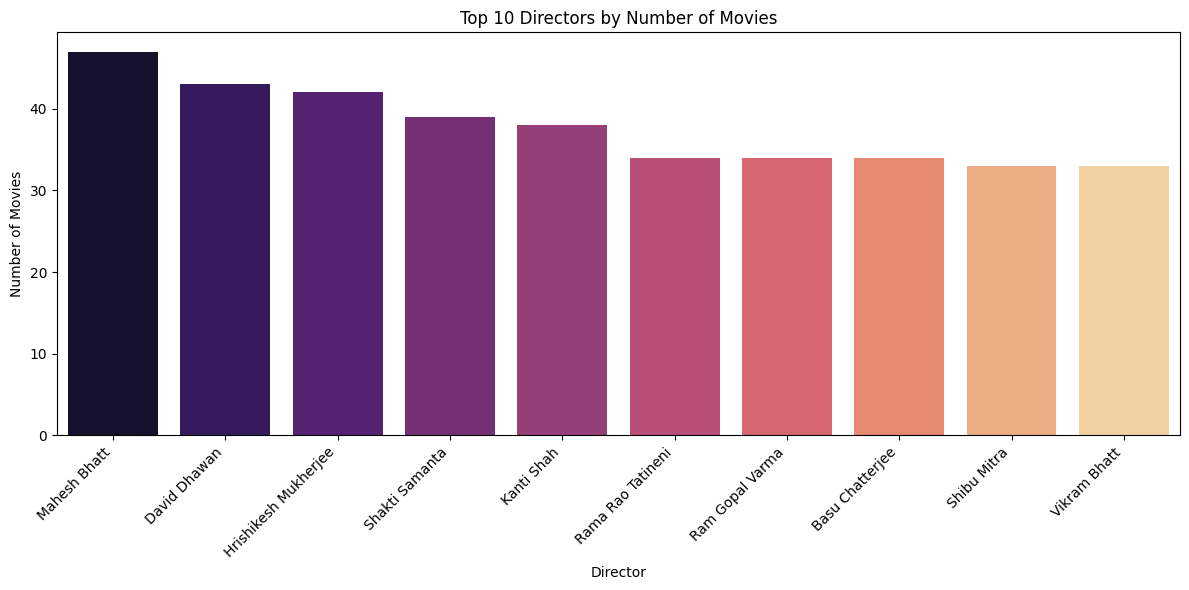

In [32]:
# Get top 10 directors by number of movies
top_directors = data['Director'].value_counts().head(10)

# Plot
plt.figure(figsize=(12,6))
sea.barplot(x=top_directors.index, y=top_directors.values, palette='magma')

# Beautify
plt.xticks(rotation=45, ha='right')  # Rotate director names for readability
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

C:\Users\SHIVAM SINHG\AppData\Local\Temp\ipykernel_3500\160999834.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(x=top_actors.index, y=top_actors.values, palette='plasma')


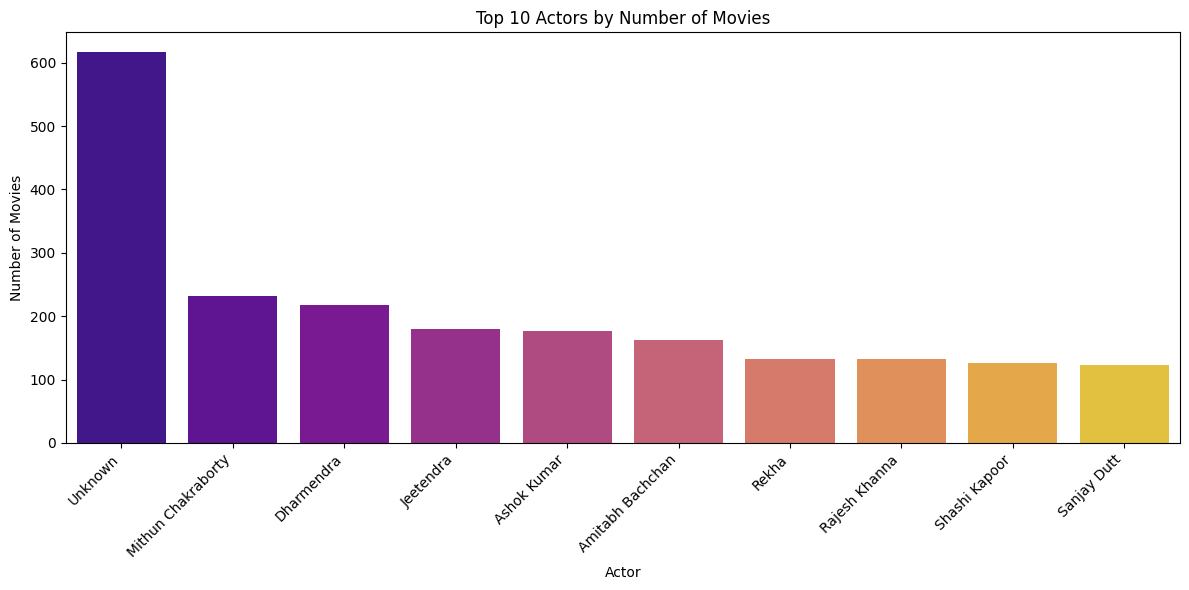

In [33]:
# Combine all actor columns into a single Series
all_actors = pd.concat([data['Actor 1'], data['Actor 2'], data['Actor 3']])

# Count appearances of each actor
top_actors = all_actors.value_counts().head(10)

# Plot
plt.figure(figsize=(12,6))
sea.barplot(x=top_actors.index, y=top_actors.values, palette='plasma')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Actors by Number of Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()


C:\Users\SHIVAM SINHG\AppData\Local\Temp\ipykernel_3500\1826119636.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(x=avg_ratings.index, y=avg_ratings.values, palette='coolwarm')


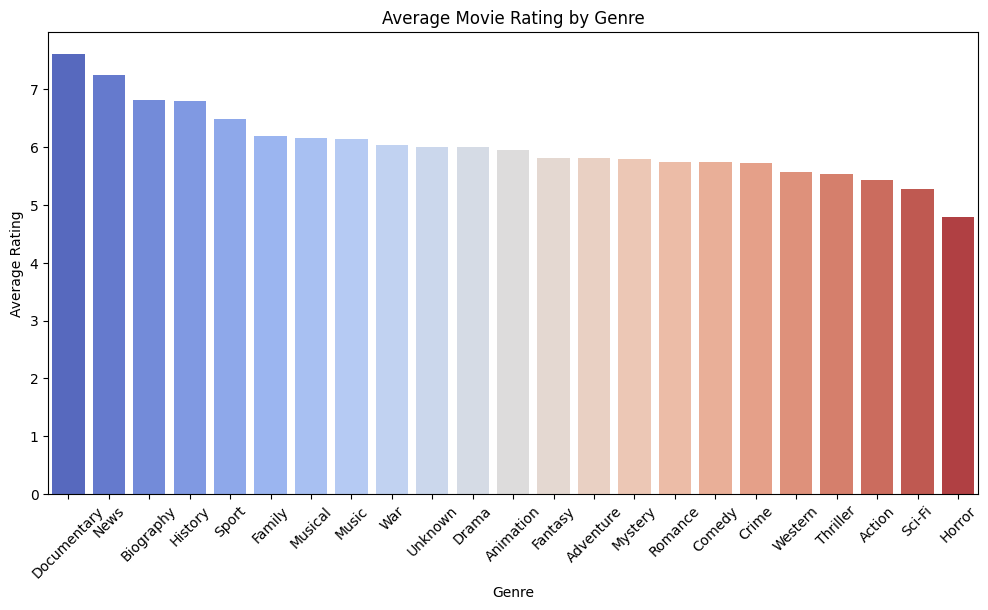

In [34]:
avg_ratings = {}
for genre in genre_dummies:
    avg_ratings[genre] = data.loc[data[genre] == 1, 'Rating'].mean()

avg_ratings = pd.Series(avg_ratings).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sea.barplot(x=avg_ratings.index, y=avg_ratings.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Average Movie Rating by Genre')
plt.ylabel('Average Rating')
plt.xlabel('Genre')
plt.show()


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7919 entries, 0 to 7918
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         7919 non-null   float64
 1   Rating       7919 non-null   float64
 2   Votes        7919 non-null   float64
 3   Director     7919 non-null   object 
 4   Actor 1      7919 non-null   object 
 5   Actor 2      7919 non-null   object 
 6   Actor 3      7919 non-null   object 
 7   Action       7919 non-null   int64  
 8   Adventure    7919 non-null   int64  
 9   Animation    7919 non-null   int64  
 10  Biography    7919 non-null   int64  
 11  Comedy       7919 non-null   int64  
 12  Crime        7919 non-null   int64  
 13  Documentary  7919 non-null   int64  
 14  Drama        7919 non-null   int64  
 15  Family       7919 non-null   int64  
 16  Fantasy      7919 non-null   int64  
 17  History      7919 non-null   int64  
 18  Horror       7919 non-null   int64  
 19  Music 

In [36]:
object_columns = ['Director', 'Actor 1', 'Actor 2', 'Actor 3']
# For each column, calculate the frequency of each name and map it back
for col in object_columns:
    # Count how many times each name appears
    freq_map = data[col].value_counts()
    
    # Map those counts to a new column
    data[col + '_freq'] = data[col].map(freq_map)

# Now drop the original string columns (optional, to keep things clean)
# data.drop(columns=object_columns, inplace=True)


In [37]:
print(data[['Director_freq', 'Actor 1_freq', 'Actor 2_freq', 'Actor 3_freq']].head())


   Director_freq  Actor 1_freq  Actor 2_freq  Actor 3_freq
0              1             2             1             1
1              1             5             1             2
2             17            18            15            13
3              7            25             4             8
4              1             1             6             1


In [38]:
data_model = data.drop(columns=['Director', 'Actor 1', 'Actor 2', 'Actor 3'])

### Step 3 Model Building

In [39]:
# importing modules
from sklearn.model_selection import train_test_split

X = data_model.drop('Rating', axis=1)  # All columns except 'Rating'
y = data_model['Rating']               # The column we want to predict

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [40]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()      # Create the model object
model.fit(X_train, y_train)     # Train (fit) the model on training data


LinearRegression()

In [41]:
y_pred = model.predict(X_test)  # Predict ratings for the test data

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 1.5100886337922108
R² Score: 0.18775107936419022


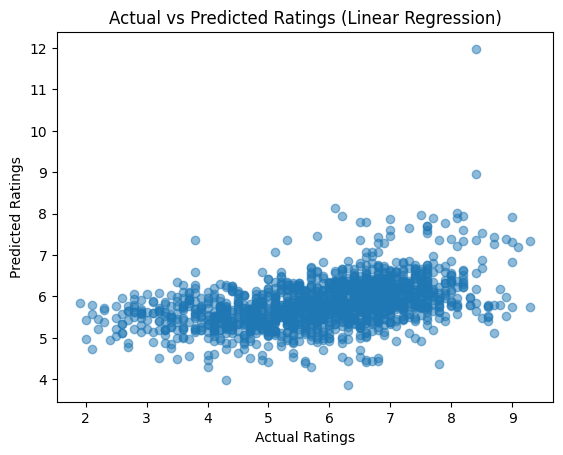

In [43]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings (Linear Regression)")
plt.show()

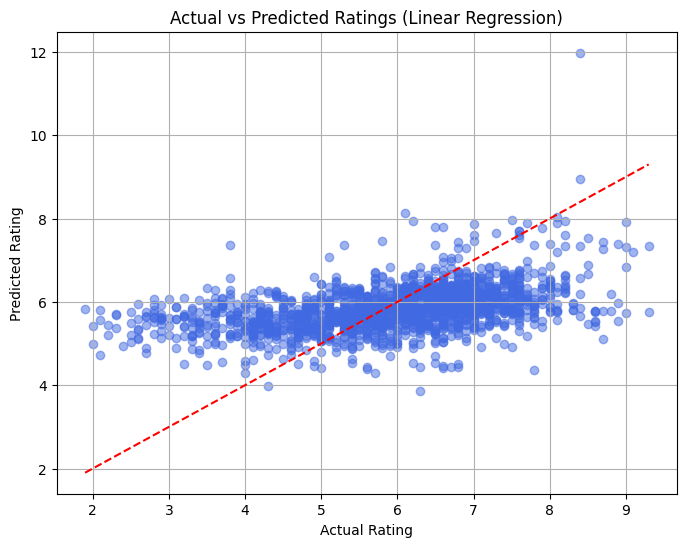

In [44]:
# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Ratings (Linear Regression)")
plt.grid(True)
plt.show()


In [45]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Predictions already made as y_pred
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae, 3))
print("Mean Squared Error (MSE):", round(mse, 3))
print("Root Mean Squared Error (RMSE):", round(rmse, 3))
print("R² Score:", round(r2, 3))


Mean Absolute Error (MAE): 0.976
Mean Squared Error (MSE): 1.51
Root Mean Squared Error (RMSE): 1.229
R² Score: 0.188


In [46]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)


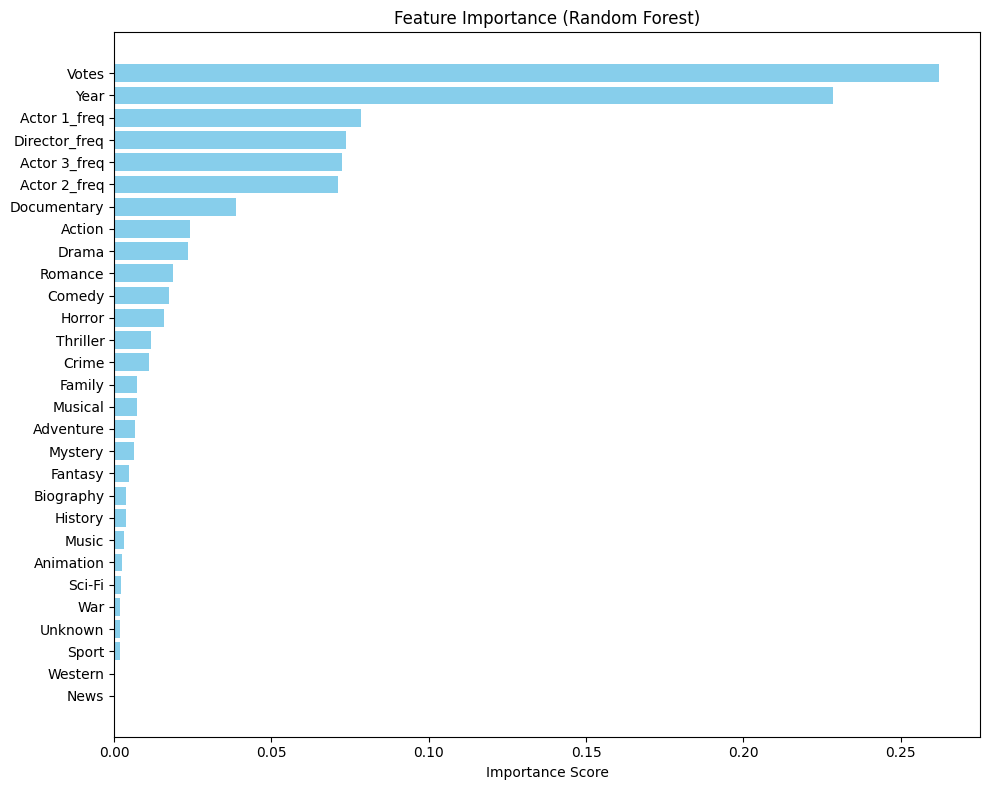

In [47]:

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for easy sorting and plotting
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=True)  # ascending for barh plot

# Plot
plt.figure(figsize=(10, 8))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='skyblue')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

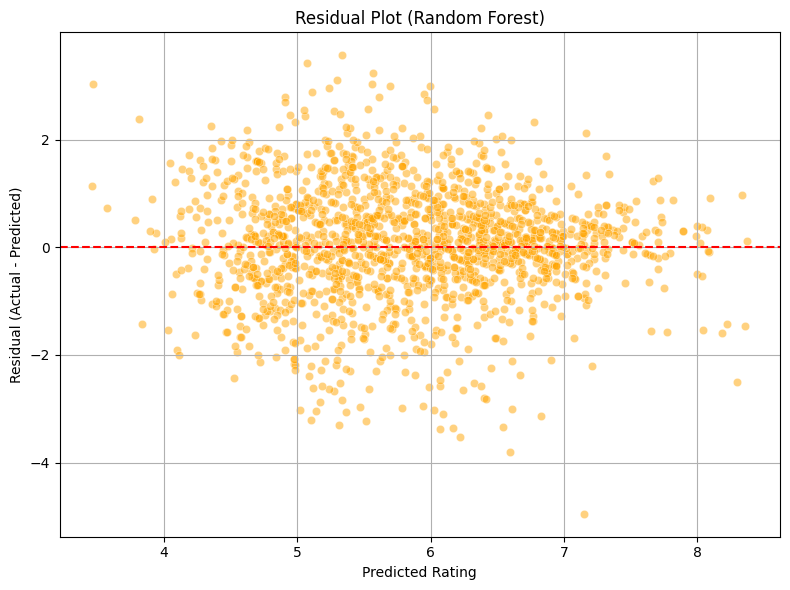

In [48]:
# Calculate residuals
residuals = y_test - rf_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sea.scatterplot(x=rf_pred, y=residuals, alpha=0.5, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Rating")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()
